# Migros Online Case Study

## Main tasks:

    1. Analyze the data, show us what you did/would do and explain us how to interpret results. You are free to use any tools you like.
    2. Describe a model you would choose to provide a website personalization solution. Define your own (imaginary) goal for this personalization.  How would you adjust the model/analysis if used regularly.
    3. Describe at least one way of how to deploy your solution in terms of software architechture. You can make assumptions on how you would receive this data and show us a pipeline. (If you have some prior knowledge consider GCP as an environment.)

In [1]:
import pandas as pd
import numpy as np

import sklearn as sk

import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

c:\users\norbert\appdata\local\programs\python\python36\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\norbert\appdata\local\programs\python\python36\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\norbert\appdata\local\programs\python\python36\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('interview_case_study.csv', header = 0, 
                 names = ['transactions','loyalty','days_since_last_contact','gender','person_id',
                          'product_ids','One.hot.1','One.hot.2','One.hot.3','One.hot.4'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transactions             100 non-null    int64  
 1   loyalty                  100 non-null    float64
 2   days_since_last_contact  100 non-null    int64  
 3   gender                   100 non-null    object 
 4   person_id                100 non-null    object 
 5   product_ids              100 non-null    object 
 6   One.hot.1                100 non-null    int64  
 7   One.hot.2                100 non-null    int64  
 8   One.hot.3                100 non-null    int64  
 9   One.hot.4                100 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 7.9+ KB


### Discussion point 1

- Question: If you look at the data, what do you see? What would you look at in general?

    - Answer: This data extract shows some raw and pre-processed information about customer's purchase records, with loyalty and transaction counts, and some limited personal details, such as gender.

There are 100 observations with 9 variables:
- transactions: interpreted as the number of previous transations during a specific amount of time (e.g last month)
- loyalty: a loyalty score (both positive and negative numbers)
- days_since_last_contact: number of days since last logged in/ last time at the store
- gender: m for male, w for women
- person_id: unique customer identifier
-  product_ids: list of products that a customer already purchased during a specific amount of time (e.g last month)
-  One.Hot.1, 2, 3 and 4: Some UNKNOWN categorizations of a customer:
    - could be about what type of products they buy the most
    - could be about which days they mostly order online
    - could be about which time of the day (morning, lunch, afternoon, evening) they order online
    - could be a classification of one-time customer, in-frequent customer, loyal customer, every-day customer

In [3]:
df.head()

,transactions,loyalty,days_since_last_contact,gender,person_id,product_ids,One.hot.1,One.hot.2,One.hot.3,One.hot.4
0,4,-1.33,2,m,170636bb-3601-4a18-b572-52650c0d2d0e,"[7881,10834,61603,62040,63288,125830]",1,0,0,0
1,6,-0.28,3,m,2a4c9697-b937-4429-9fd3-5529929a1ab9,"[10834,61603,62040,63288,125830]",1,0,0,0
2,5,-0.22,1,w,4d12441d-3748-4b05-81bf-fd24f9f9d6f4,"[63288,125830]",1,0,0,0
3,7,-0.29,0,m,00f173be-96b1-4407-809c-6882e5bbb1fd,"[7881,10834]",0,1,0,0
4,4,1.06,5,m,f5aa1643-398f-4027-ab75-7b72ebe92d90,"[7881,10834,62040,63288,125830]",0,0,1,0


### Data Types:
  - transactions and days_since_last_contact (numerical, integer)
  - loyalty (numerical, float)
  - gender (categorical, binary)
  - personID (object - string, ID)
  - product_ids (object - list/array, size varies)
  - One.Hot.1, 2, 3 and 4 (categorical, binary ... could even be mutually exclusive categories)

### Discussion point 2

- Question: What has been done already? What has not been done? What else should (not)(have) been done?
     - DONE: importing data, and looking at it
     - HAS NOT BEEN DONE: Data Transformations(product IDs, frequency count), Data Pre-processing (categorical vars), EDA
     - SHOUND HAVE NOT BEEN DONE: converting some categories to One.Hot.Encodings without specifying what the encodings represent

### Data Pre-processing

In [4]:
df['gender'] = pd.Categorical(df['gender'])
#df['product_ids'] = pd.Series(df['product_ids'])

df['One.hot.1'] = pd.Categorical(df['One.hot.1'])
df['One.hot.2'] = pd.Categorical(df['One.hot.2'])
df['One.hot.3'] = pd.Categorical(df['One.hot.3'])
df['One.hot.4'] = pd.Categorical(df['One.hot.4'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   transactions             100 non-null    int64   
 1   loyalty                  100 non-null    float64 
 2   days_since_last_contact  100 non-null    int64   
 3   gender                   100 non-null    category
 4   person_id                100 non-null    object  
 5   product_ids              100 non-null    object  
 6   One.hot.1                100 non-null    category
 7   One.hot.2                100 non-null    category
 8   One.hot.3                100 non-null    category
 9   One.hot.4                100 non-null    category
dtypes: category(5), float64(1), int64(2), object(2)
memory usage: 5.0+ KB


#### Demo & Explanation for One-Hot Encodings being present in the data

In [5]:
demo = pd.DataFrame({"grocery_type": ["dairy", "dairy", "vegetable", "meat", "fruit", "meat"]})
print("The original data\n")
print(demo)

print("\n")
print("-" * 30)

demo_new = pd.get_dummies(demo, columns=["grocery_type"], prefix="Product")
print("The transformed data\n")
print(demo_new)

The original data

  grocery_type
0        dairy
1        dairy
2    vegetable
3         meat
4        fruit
5         meat


------------------------------
The transformed data

   Product_dairy  Product_fruit  Product_meat  Product_vegetable
0              1              0             0                  0
1              1              0             0                  0
2              0              0             0                  1
3              0              0             1                  0
4              0              1             0                  0
5              0              0             1                  0


### Discussion point 3

- Question: What problems / challenges would you see?
    - Answer: One problem with the data is that we have the product ID's in individual lists
    - we do not have a list of unique product IDs, and it's not easy to get product frequency count without some data transformation

### Discussion point 4

- Question: How would you choose which data to integrate into the model and and how much of it?
    - Answer: I would choose all of our numerical variables, and convert the remaining categorical variables into a one hot encoding, then build an 80-20 train-set set on which we can fit models
    - Answer: I would most likely rely on transaction, days_since_last_contact, loyalty, and custome feature created from the length of the producy_IDs list for predicting the one_hot_encoding categories

### Discussion point 5

- Question: How would you show accuracy/ precision or relevant statistics of your chosen model?
    - Answer: depends on the task. Is it supervised/unsupervised ? if supervised, then regression or classification?
    - For Classification: F1-score, recall, precision, and accuracy (if balanced classes)
    - For Regression: mean squared error, and percent variance explained (basically R squared value)

## Task 1: Exploratory Data Analysis (mainly visualizations)

First step of my analysis would have to be some basic exploratory analysis, mostly consisting of visualizations.

- I would like to see descriptive statistics for the numerical variables, then plot a histogram to see the distributiom of all numerical values
- Next I would like to plot some bar plots for the categorical variables. What I am mostly interested here is the percentage breakdown between the different categories 
- Finally, before getting into data modeling, I would like to see a list of unique product IDs, then frequency counts of those product IDs, to see most purchased products

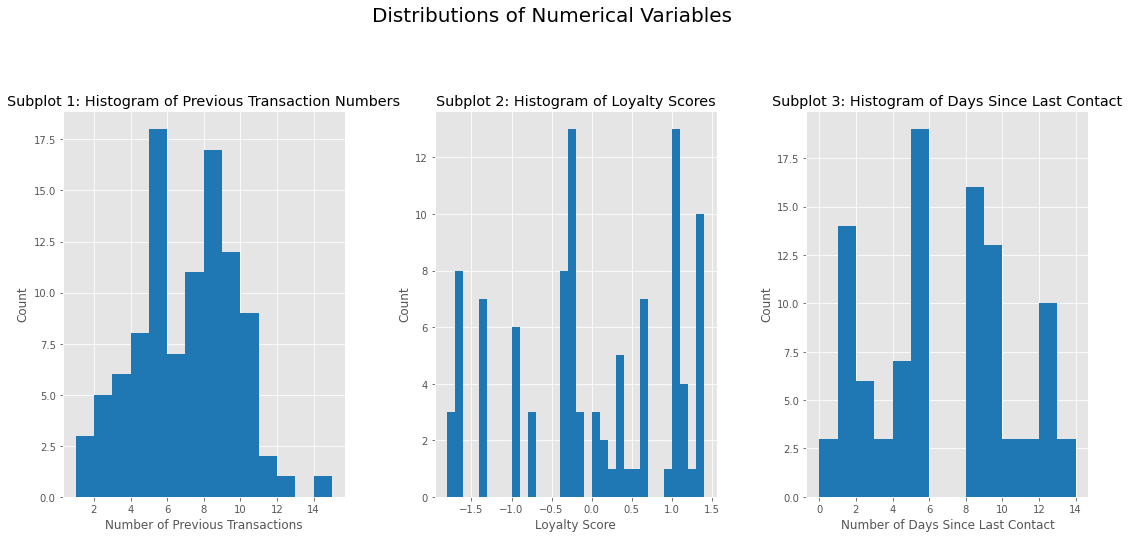

In [6]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(16,8))

# Create subplot 1
ax1 = fig.add_subplot(131) # Grid of 1x3, this is suplot 1
ax1.set_xlabel('Number of Previous Transactions')
ax1.set_ylabel('Count')
ax1.set_title('Subplot 1: Histogram of Previous Transaction Numbers')

ax1 = plt.hist(df['transactions'], bins=np.arange(1,16,1), color = 'tab:blue')

# Create subplot 2
ax2 = fig.add_subplot(132) # Grid of 1x3, this is suplot 2
ax2.set_xlabel('Loyalty Score')
ax2.set_ylabel('Count')
ax2.set_title('Subplot 2: Histogram of Loyalty Scores')

ax2 = plt.hist(df['loyalty'], bins=np.arange(-1.8,1.5,0.1), color = 'tab:blue')

# Create subplot 3
ax3 = fig.add_subplot(133) # Grid of 1x3, this is suplot 3
ax3.set_xlabel('Number of Days Since Last Contact')
ax3.set_ylabel('Count')
ax3.set_title('Subplot 3: Histogram of Days Since Last Contact')

ax3 = plt.hist(df['days_since_last_contact'], bins=np.arange(0,15,1), color = 'tab:blue')

# Add main title
plt.suptitle('Distributions of Numerical Variables', size = 20)

plt.tight_layout(pad=4)
plt.ticklabel_format(style = 'plain')
plt.show()

In [7]:
df.describe()

,transactions,loyalty,days_since_last_contact
count,100.000000,100.000000,100.000000
mean,6.550000,-0.000090,6.280000
std,2.709411,1.002703,3.861438
min,1.000000,-1.710000,0.000000
25%,5.000000,-0.742500,3.000000
50%,7.000000,-0.100500,5.000000
75%,8.250000,1.032500,9.000000
max,15.000000,1.400000,14.000000


### Interpretation:
- Number of Transactions is between 1 and 15, with an average 6 or 7 transactions.
- The number of transactions variable looks the closest to a left skewed normal distribution, but it is not really normally distr.

- Loyalty scores are between -1.71 and 1.40, their distribution does not resemble any popular and known distributions

- Days since last contact is betweem 0 and 14 days, and on average it's 6 days
- The distribution seems bimodal, and almost symetric, identifying 2 different user groups

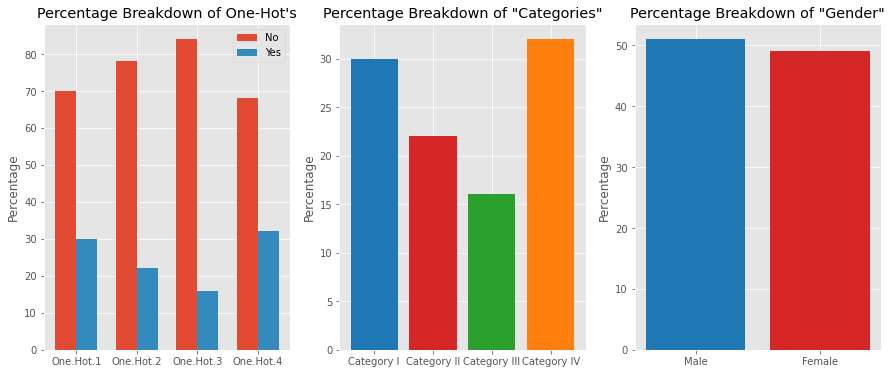

In [8]:
labels = ['One.Hot.1', 'One.Hot.2', 'One.Hot.3', 'One.Hot.4']

labels_category = ['Category I', 'Category II', 'Category III', 'Category IV']


# in this specific case we have sample size = 100, so we don't even need to calculate percentages
# the actual value counts will be the percentage
no_percentage = [df['One.hot.1'].value_counts()[0], df['One.hot.2'].value_counts()[0], 
                 df['One.hot.3'].value_counts()[0], df['One.hot.4'].value_counts()[0]]

yes_percentage = [df['One.hot.1'].value_counts()[1], df['One.hot.2'].value_counts()[1], 
                 df['One.hot.3'].value_counts()[1], df['One.hot.4'].value_counts()[1]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(131)
ax1.bar(x - width/2, no_percentage, width, label='No')
ax1.bar(x + width/2, yes_percentage, width, label='Yes')

ax1.set_ylabel('Percentage')
ax1.set_title('Percentage Breakdown of One-Hot\'s')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()


ax2 = fig.add_subplot(132)

ax2.set_ylabel('Percentage')
ax2.set_title('Percentage Breakdown of "Categories"')

ax2 = plt.bar(labels_category, yes_percentage, color = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange'])



ax3 = fig.add_subplot(133)

ax3.set_ylabel('Percentage')
ax3.set_title('Percentage Breakdown of "Gender"')

ax3 = plt.bar(['Male', 'Female'], [df['gender'].value_counts()['m'], df['gender'].value_counts()['w']], color = ['tab:blue', 'tab:red'])


plt.show()

In [9]:
yes_percentage

[30, 22, 16, 32]

### Interpretation:

- First plot shows the percetage breakdown of Yes/No's for the One.Hot Encodings
    - From this plot we can see that the Yes's add up to 100, so the 4 events are mutually exclusive
    
- The second plot shows percentage breakdown of only the Yes's for each "Category"
    - Category 1 and 4 are the most frequent in our data set
    
- The third plot shows percentage breakdown between men and women in our data set
    - The distribution is even between the 2 genders

### Frequency counts of product IDs

In [10]:
import json

df['processed_product_ids'] = df['product_ids'].apply(lambda x: np.array(json.loads(x)))

In [11]:
df['processed_product_ids'].explode().value_counts()

10834     82
63288     67
125830    67
7881      64
61603     53
62040     49
Name: processed_product_ids, dtype: int64

In [12]:
unique_product_list = df['processed_product_ids'].explode().unique().tolist()
unique_product_list

[7881, 10834, 61603, 62040, 63288, 125830]

- As it turns out, our small data set has only 6 unique products (with the product ID's shown above).

One could find these products online, by querying https://shop.migros.ch/de/search?query=10834 to see that Product ID = 10834 is a chocolate bar.

- 7881 is mango, while 125830 is carrots.

The frequency counts for the 6 unique product ID's can be seen above.

- The top-3 most frequently sold products from our data set are products IDs:
    - 10834 (chocolate bar, 82 out of 100 purchases)
    - 63288 (UNKNOWN, 67 out of 100 purchases)
    - 125830 (UNKNOWN, 67 out of 100 purchases)

## TASK 2: Data Modeling

Describe a model you would choose to provide a website personalization solution. Define your own (imaginary) goal for this personalization.  How would you adjust the model/analysis if used regularly.
 

After the initial exploratory data analysis I have concluded that even with only 9 features (columns) there are muliple possible predictive analytics tasks that could provide a website personalization solution:

#### Predicting loyalty:
- My first idea was to fit a supervised ML model for loyalty as a regression task, to using all the other numerical and categorical features as predictors 
    - Linear Regression, k-nn Regression, decision tree based regression or SVM would have worked here
    - On a secondary thought I let go of this idea, as I did not think that the current variables that we have would be relevant enough to predict loyalty
        - we would require data about shopping patterns over a longer period of time
        - shopping patterns over several months to 1 year
        - a series of total amount purchased, to see trends
        - shopping day pattern ( once a month vs. weekly)
        - average number of products purchased during a week/ month
- I do not have access to this type of detailed data, thus I concluded that only Gender, a few unknown One.Hot.Encodings, # of days since last contact and transaction number would not be enough to get an accurate picture of loyalty

#### Market Basket Analysis (Association Analysis) for Personalized Shopping Recommendation

- Instead of inaccurately predicting loyalty, I would like my modeling to be focused on Market Basket Analysis
- In my personal opinion the highest level of website personalization that is achievable with the current data is to recommend the customer products that they would be interested in purchasing next
- This can be achieved by Association Mining or Market Basket Analysis
- This is a form of unsupervised learning, and some threshold parameters need to be determined by the data scientist
- The goal of this analysis is to take a look at what a user previously purchased, and determine associations from what other products different customers got ALONGSIDE the product that our original customer has purchased
        
#### Predicting "mutually exclusive" one.hot categorization:
- Lastly, I had this idea of augmenting the analysis with modeling the unknown categorization of users
- First we need to restructure One.Hot.1, 2, 3 & 4 data to a new feature called "category", and have this variable have values [1,2,3,4]
- Use all numerical and categorical variables to predict "category", which is unknown to us right now, but it could be considerred a segmentation/ classification of different type of customers, thus this could be a potential insight for the website personalization task

 

In [13]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Intro to Association Analysis 

 - Given a set of transactions, find rules that will predict the occurrence of an item based on the occurrences of other items in the transaction. 
      - For example, “If someone buys beer and sausage, then is likely to buy mustard with high probability“.

.
.
.


### More technical definitions

The algorithm used for Association Analysis/Mining is called Apriori. This algorithm is used for extracting frequent itemsets. 

- In the Apriori algorithm, frequent k-itemsets are iteratively created for k=1,2,3, and so on… such that k-itemset is created by using prior knowledge of (k-1) itemset. 
    - For e.g 3-itemset is generated with prior information of 2-itemset, 4-itemset is created with prior knowledge of 3-itemset and so on.
    
Because it uses prior knowledge of (k-1)itemset for creating k-itemset, it is named as Apriori algorithm.


.
.
.

### There are 3 measures that are being computed when learning associations:

- Support is the relative frequency that the rules show up. The higher the support, the more useful the relationship. 

- Confidence is a measure of the reliability of the rule. For product recommendation, a 50% confidence may be perfectly acceptable but in a medical situation this level is not high enough.

- Lift is the ratio of the observed support to that expected if the two rules were independent.
    - The basic rule of thumb is that a lift value close to 1 means the rules were completely independent. 
    - Lift values > 1 are generally more “interesting” and could be indicative of a useful rule pattern.


#### An itemset is considered as "frequent" if it meets a user-specified support threshold. 

For instance, if the support threshold is set to 0.5 (50%), a frequent itemset is defined as a set of items that occur together in at least 50% of all transactions in the database.


### Prepare binary matrix with columns corresponding to products and rows corresponding to a person's shopping list

In [14]:
def encode_data(df, person_id, product):
    shopping_list = df[df['person_id'] == person_id]['processed_product_ids'].to_numpy()[0]
    if product in shopping_list:
        return 1
    else:
        return 0
    
encode_data(df, "2a4c9697-b937-4429-9fd3-5529929a1ab9", 62040)

1

In [15]:
def build_market_basket(df):
    unique_product_list = df['processed_product_ids'].explode().unique().tolist()
    products_str = [str(x) for x in unique_product_list]

    market_basket = pd.DataFrame(columns = products_str, index = df['person_id'])

    for person_id in df['person_id'].tolist():
        for product in unique_product_list:
            market_basket.loc[person_id, str(product)] = encode_data(df, person_id, product)

    return market_basket

market_basket = build_market_basket(df)
market_basket

,7881,10834,61603,62040,63288,125830
person_id,,,,,,
170636bb-3601-4a18-b572-52650c0d2d0e,1,1,1,1,1,1
2a4c9697-b937-4429-9fd3-5529929a1ab9,0,1,1,1,1,1
4d12441d-3748-4b05-81bf-fd24f9f9d6f4,0,0,0,0,1,1
00f173be-96b1-4407-809c-6882e5bbb1fd,1,1,0,0,0,0
f5aa1643-398f-4027-ab75-7b72ebe92d90,1,1,0,1,1,1
...,...,...,...,...,...,...
f00c336b-e02c-44e5-8bfa-59b71374fa54,0,0,0,0,1,1
49402263-e3b7-4305-a09e-f5508ab4aa92,0,0,0,0,1,1
ea684db5-6354-4e26-80a5-555115109460,1,1,0,0,0,0


### Applying to the Apriori algorithm to get association rules

In [16]:
def get_association_rules(market_basket, min_support, min_confidence, max_len = 2):
    # compute frequent items using the Apriori algorithm
    frequent_itemsets = apriori(market_basket, min_support = min_support, max_len = max_len, use_colnames=True)

    # compute all association rules for frequent_itemsets
    rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = min_confidence)
    
    return rules

rules = get_association_rules(market_basket, min_support = 0.40, min_confidence = 0.50)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(10834),(7881),0.82,0.64,0.64,0.780488,1.219512,0.1152,1.640000
1,(7881),(10834),0.64,0.82,0.64,1.000000,1.219512,0.1152,inf
2,(61603),(10834),0.53,0.82,0.53,1.000000,1.219512,0.0954,inf
3,(10834),(61603),0.82,0.53,0.53,0.646341,1.219512,0.0954,1.328966
4,(10834),(62040),0.82,0.49,0.49,0.597561,1.219512,0.0882,1.267273
5,(62040),(10834),0.49,0.82,0.49,1.000000,1.219512,0.0882,inf
6,(63288),(10834),0.67,0.82,0.49,0.731343,0.891882,-0.0594,0.670000
7,(10834),(63288),0.82,0.67,0.49,0.597561,0.891882,-0.0594,0.820000
8,(125830),(10834),0.67,0.82,0.49,0.731343,0.891882,-0.0594,0.670000
9,(10834),(125830),0.82,0.67,0.49,0.597561,0.891882,-0.0594,0.820000


## Additional modeling: predicting "category"


Transform the data to have category as a integer

In [17]:
def cat(x):
    if x['One.hot.1']==1:
        return 1
    
    if x['One.hot.2']==1:
        return 2
    
    if x['One.hot.3']==1:
        return 3
    
    if x['One.hot.4']==1:
        return 4
    
def num_items(x):
    return len(x['processed_product_ids'])
    
df['Category'] = [0] * 100
df['Category'] = df.apply(cat, axis=1)

df['Num.Products.Purchased'] = df.apply(num_items, axis=1)

### Prepare data for classification task

In [18]:
from sklearn.model_selection import train_test_split

X = df.loc[:, ['transactions', 'loyalty', 'days_since_last_contact', 'Num.Products.Purchased']]
y = df.loc[:, 'Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 2021)

In [19]:
X_train.head()

,transactions,loyalty,days_since_last_contact,Num.Products.Purchased
92,8,1.40,8,5
28,5,-1.36,12,2
37,10,-0.33,2,5
83,3,-1.71,1,3
3,7,-0.29,0,2


In [20]:
y.head()

0    1
1    1
2    1
3    2
4    3
Name: Category, dtype: int64

### Decision Tree Classifier

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


decTree_1 = DecisionTreeClassifier(max_depth=2)
decTree_2 = DecisionTreeClassifier(max_depth=5)

decTree_1.fit(X_train, y_train)
decTree_2.fit(X_train, y_train)

y1_predicted = decTree_1.predict(X_test)
y2_predicted = decTree_2.predict(X_test)

print('Decision Trees Model Evaluation\n')

print("Decision Tree with Max_depth = 2 \nConfusion Matrix")
print(confusion_matrix(y_test, y1_predicted, labels=[1,2,3,4]))

print("\nClassification Report")
print(classification_report(y_test, y1_predicted, target_names=['Class 1', "Class 2", "Class 3", "Class 4"]))

Decision Trees Model Evaluation

Decision Tree with Max_depth = 2 
Confusion Matrix
[[3 1 0 0]
 [0 2 0 1]
 [0 0 5 0]
 [0 0 0 8]]

Classification Report
              precision    recall  f1-score   support

     Class 1       1.00      0.75      0.86         4
     Class 2       0.67      0.67      0.67         3
     Class 3       1.00      1.00      1.00         5
     Class 4       0.89      1.00      0.94         8

    accuracy                           0.90        20
   macro avg       0.89      0.85      0.87        20
weighted avg       0.91      0.90      0.90        20



In [22]:
print("Decision Tree with Max_depth = 5 \nConfusion Matrix")
print(confusion_matrix(y_test, y2_predicted, labels=[1,2,3,4]))

print("\nClassification Report")
print(classification_report(y_test, y2_predicted, target_names=['Class 1', "Class 2", "Class 3", "Class 4"]))

Decision Tree with Max_depth = 5 
Confusion Matrix
[[3 0 1 0]
 [0 3 0 0]
 [0 0 5 0]
 [0 0 0 8]]

Classification Report
              precision    recall  f1-score   support

     Class 1       1.00      0.75      0.86         4
     Class 2       1.00      1.00      1.00         3
     Class 3       0.83      1.00      0.91         5
     Class 4       1.00      1.00      1.00         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.94        20
weighted avg       0.96      0.95      0.95        20



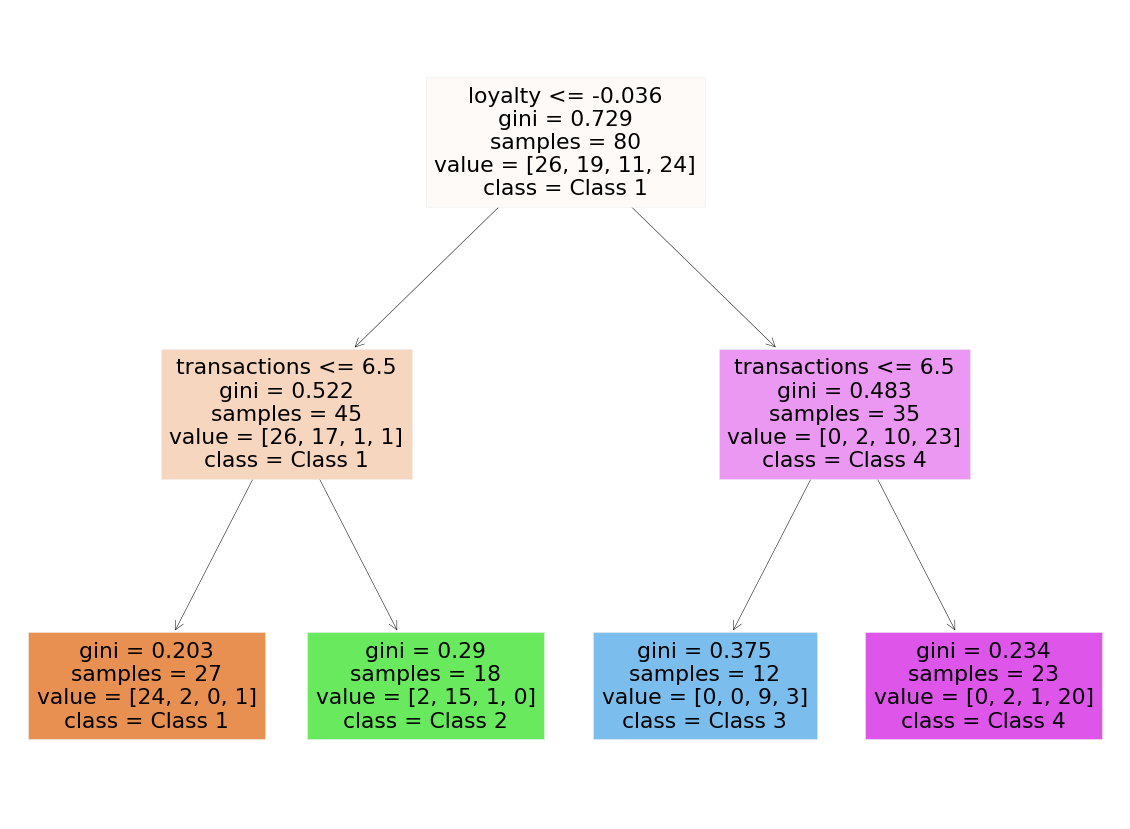

In [23]:
import graphviz
from sklearn import tree

fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(decTree_1, 
                   feature_names=['transactions', 'loyalty', 'days_since_last_contact', 'Num.Products.Purchased'],  
                   class_names= ['Class 1', 'Class 2', 'Class 3', 'Class 4'],
                   filled=True)

fig.show()
fig.savefig("decision_tree.png")

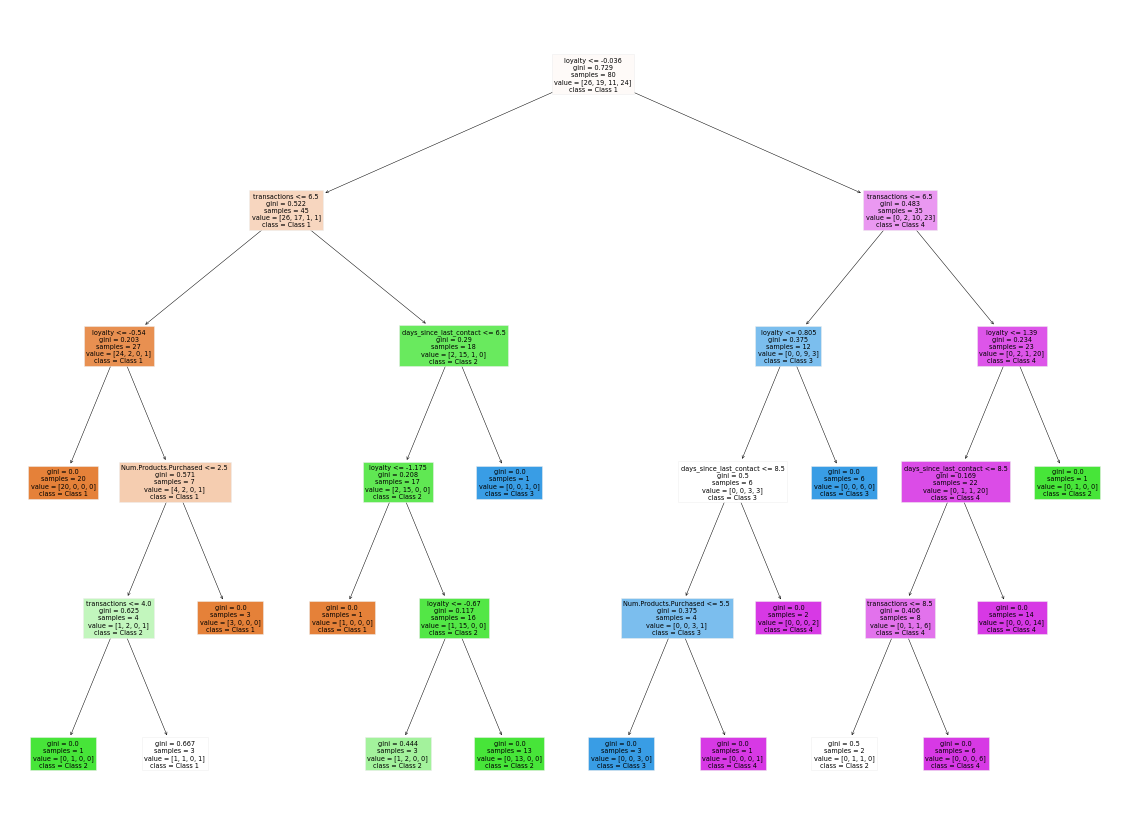

In [24]:
import graphviz
from sklearn import tree

fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(decTree_2, 
                   feature_names=['transactions', 'loyalty', 'days_since_last_contact', 'Num.Products.Purchased'],  
                   class_names= ['Class 1', 'Class 2', 'Class 3', 'Class 4'],
                   filled=True)

fig.show()
fig.savefig("decision_tree.png")

The decision tree classification algorithm made 1 mistake only (from a test size of 20). I would have continued fitting a couple of more models (k-nn Classification, SVM, maybe Random Forest), but I am satisfied with this accuracy.

# Task 3: Deployment Software Architecture for the solution

Describe at least one way of how to deploy your solution in terms of software architechture. You can make assumptions on how you would receive this data and show us a pipeline. (If you have some prior knowledge consider GCP as an environment.)

### App architecture:

##### Data Storage: 
   -  prototyping: csv; 
   -  future: Relational DB (Cloud SQL Storage)
   
##### Backend component:
- Flask Python Server 

##### Frontend component:
- HTML, JavaScript, CSS web service

Both deployed on GCP (AppEngine)

This cloud setup is feasible for both a prototype and a production application

For other analytics tools integrations (such as A/B testing, reporting tools, and predicting user behaviour) - adding firebase to the web service

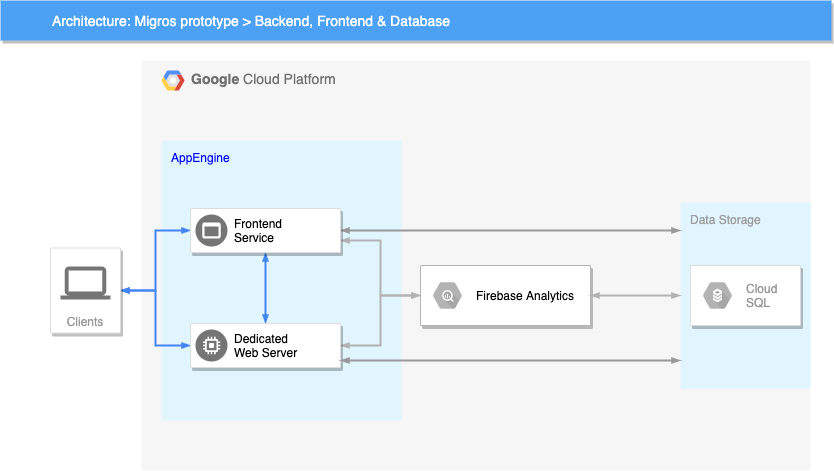

### Some of the implementation (also found in web-app/app.py)

In [25]:
def get_rules_look_up(rules):
    rules_look_up = {}

    for idx in range(0, len(rules['antecedents'])):
        if rules.loc[idx, 'antecedents'] in rules_look_up:
            rules_look_up[rules.loc[idx, 'antecedents']] = rules_look_up[rules.loc[idx, 'antecedents']] + list(rules.loc[idx, 'consequents'])
        else:
            rules_look_up[rules.loc[idx, 'antecedents']] = list(rules.loc[idx, 'consequents'])

    return rules_look_up

get_rules_look_up(rules)

{frozenset({'10834'}): ['7881', '61603', '62040', '63288', '125830'],
 frozenset({'7881'}): ['10834'],
 frozenset({'61603'}): ['10834'],
 frozenset({'62040'}): ['10834', '63288', '125830'],
 frozenset({'63288'}): ['10834', '62040', '125830'],
 frozenset({'125830'}): ['10834', '62040', '63288']}

In [26]:
def int_to_frozenset(product_id):
    return frozenset({str(product_id)})
   
int_to_frozenset(7881)

frozenset({'7881'})

In [27]:
def strList_to_intList(lst):
    new_list = []
    for i in lst:
        new_list.append(int(i))
    return new_list

strList_to_intList(['7881', '61603', '62040', '63288', '125830'])

[7881, 61603, 62040, 63288, 125830]

In [28]:
df[df['person_id'] == "4d12441d-3748-4b05-81bf-fd24f9f9d6f4"]['processed_product_ids'].to_numpy()[0].tolist()

[63288, 125830]

In [29]:
def get_shoppingList(person_id):
    return df[df['person_id'] == person_id]['processed_product_ids'].to_numpy()[0].tolist()

get_shoppingList("4d12441d-3748-4b05-81bf-fd24f9f9d6f4")

[63288, 125830]

In [30]:
rules_lookup = get_rules_look_up(rules)

def get_recommendations(person_id):
    products_to_recommend = []
    
    items_bought = get_shoppingList(person_id)
    
    for i in items_bought:
        if int_to_frozenset(i) in rules_lookup:
            recommendations = rules_lookup[int_to_frozenset(i)]
            recommendations = strList_to_intList(recommendations)
            products_to_recommend = products_to_recommend + recommendations
    
    final_recommendations = [item for item in products_to_recommend if item not in items_bought]
    
    if len(final_recommendations) == 0:
        final_recommendations = items_bought
    
    return list(set(final_recommendations))

In [31]:
get_recommendations("4d12441d-3748-4b05-81bf-fd24f9f9d6f4")

[62040, 10834]

In [32]:
get_recommendations("170636bb-3601-4a18-b572-52650c0d2d0e")

[61603, 125830, 7881, 10834, 63288, 62040]